In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv("games.csv")
df.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3


In [3]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

D:\bharath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


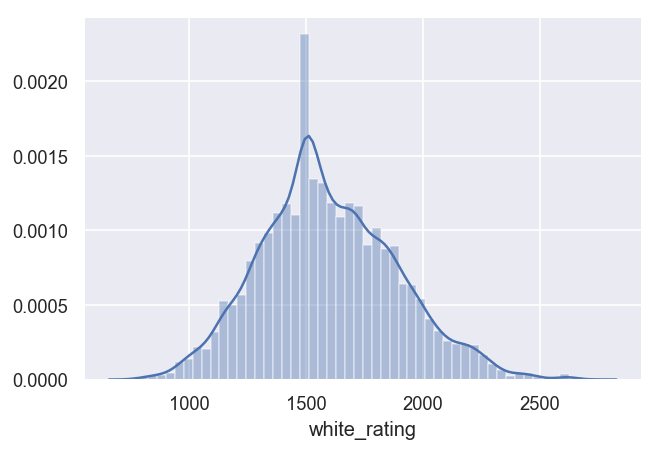

In [4]:
plt.figure(dpi=120)
sns.distplot(df["white_rating"])

D:\bharath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


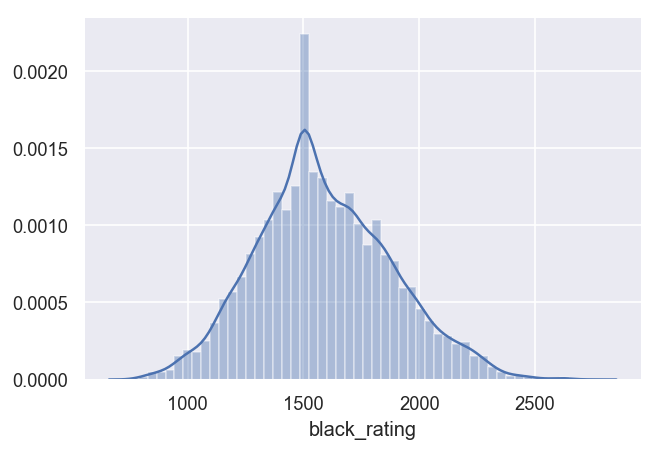

In [5]:
plt.figure(dpi=120)
sns.distplot(df["black_rating"])

In [6]:
print("Mean Rating of White ",df["white_rating"].mean())
print("Mean Rating of Black ",df["black_rating"].mean())

Mean Rating of White  1596.6318675840064
Mean Rating of Black  1588.8319872370128


In [7]:
df.groupby("winner")["id"].count()

winner
black     9107
draw       950
white    10001
Name: id, dtype: int64

In [8]:
df["winnerRating"]=np.nan

In [9]:
df.head(3)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,winnerRating
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,NaN
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,NaN
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,NaN


In [10]:
df.loc[df["winner"]=="white","winnerRating"]=df["white_rating"]
df.loc[df["winner"]=="black","winnerRating"]=df["black_rating"]
df.loc[df["winner"]=="draw","winnerRating"]=df[["black_rating","white_rating"]].mean(axis=1)

In [11]:
df["moves"].head()

0    d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...
1    d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...
2    e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...
3    d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...
4    e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...
Name: moves, dtype: object

In [12]:
df["moves"][0]

'd4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5 Bf4'

### Alternate method

In [13]:
df["whiteFirst"]=df["moves"].str.split(' ').str[0]
df["blackFirst"]=df["moves"].str.split(' ').str[1]

# Most Common moves by White and Black

In [14]:
df["whiteFirst"].value_counts()

e4     12598
d4      4522
Nf3      725
c4       716
e3       416
g3       186
b3       173
f4       166
d3       131
Nc3       99
b4        88
c3        56
g4        38
h4        33
a4        28
a3        27
f3        23
Nh3       15
h3        14
Na3        4
Name: whiteFirst, dtype: int64

In [15]:
df["blackFirst"].value_counts()

e5     6988
d5     3667
c5     2883
e6     2083
Nf6    1693
c6      734
d6      543
Nc6     392
g6      387
b6      286
f5      166
a6       50
f6       41
b5       25
h5       24
a5       23
h6       19
g5       18
Nh6      12
Na6       6
Name: blackFirst, dtype: int64

In [16]:
df["openingMove"]=df["opening_name"].str.replace("|",",").str.split(":").str[0]

In [17]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply',
       'winnerRating', 'whiteFirst', 'blackFirst', 'openingMove'],
      dtype='object')

In [18]:
df1=df[['rated','turns','victory_status','winner','white_rating',
        'black_rating','openingMove','whiteFirst', 'blackFirst','winnerRating']]
df1.head()

,rated,turns,victory_status,winner,white_rating,black_rating,openingMove,whiteFirst,blackFirst,winnerRating
0,False,13,outoftime,white,1500,1191,Slav Defense,d4,d5,1500.0
1,True,16,resign,black,1322,1261,Nimzowitsch Defense,d4,Nc6,1261.0
2,True,61,mate,white,1496,1500,King's Pawn Game,e4,e5,1496.0
3,True,61,mate,white,1439,1454,Queen's Pawn Game,d4,d5,1439.0
4,True,95,mate,white,1523,1469,Philidor Defense,e4,e5,1523.0


In [19]:
df1["openingMove"].value_counts().head(20)

Sicilian Defense           2573
French Defense             1306
Queen's Pawn Game          1059
Italian Game                981
King's Pawn Game            917
Ruy Lopez                   858
English Opening             720
Scandinavian Defense        716
Caro-Kann Defense           593
Scotch Game                 465
Queen's Gambit Declined     394
Four Knights Game           370
Van't Kruijs Opening        368
Zukertort Opening           336
Bishop's Opening            323
Indian Game                 319
Philidor Defense            272
Queen's Gambit Accepted     253
Russian Game                252
Queen's Gambit Refused      251
Name: openingMove, dtype: int64

Mean Rating of the winners 1636.692466846146


D:\bharath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


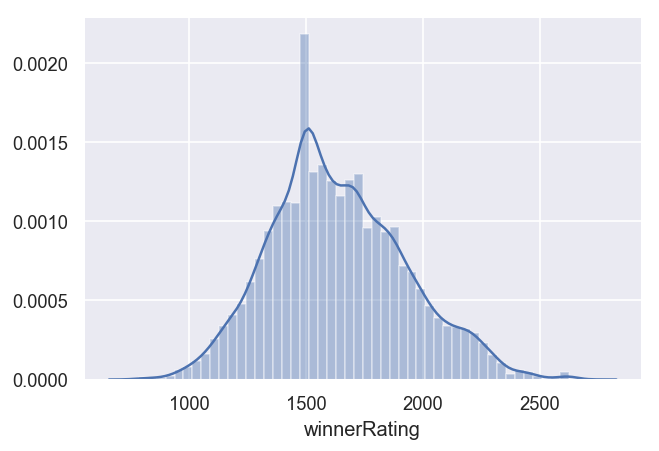

In [20]:
plt.figure(dpi=120)
print("Mean Rating of the winners",df["winnerRating"].mean())
sns.distplot(df1["winnerRating"])
plt.show()

In [21]:
df1.describe()["winnerRating"]

count    20058.000000
mean      1636.692467
std        290.018038
min        784.000000
25%       1437.000000
50%       1607.000000
75%       1827.000000
max       2700.000000
Name: winnerRating, dtype: float64

In [22]:
winnerRating_min=df1["winnerRating"].min()
winnerRating_max=df1["winnerRating"].max()

In [23]:
winnerRating_cut=pd.cut(df1.winnerRating,np.linspace(winnerRating_min,winnerRating_max,9))
winnerRating_cut.head()

0    (1263.0, 1502.5]
1    (1023.5, 1263.0]
2    (1263.0, 1502.5]
3    (1263.0, 1502.5]
4    (1502.5, 1742.0]
Name: winnerRating, dtype: category
Categories (8, interval[float64]): [(784.0, 1023.5] < (1023.5, 1263.0] < (1263.0, 1502.5] < (1502.5, 1742.0] < (1742.0, 1981.5] < (1981.5, 2221.0] < (2221.0, 2460.5] < (2460.5, 2700.0]]

In [24]:
df.pivot_table(values="turns",index=winnerRating_cut,columns="winner")

winner,black,draw,white
winnerRating,,,
"(784.0, 1023.5]",53.273810,52.750000,52.810127
"(1023.5, 1263.0]",53.126844,70.831169,51.304799
"(1263.0, 1502.5]",57.003949,73.987179,53.963597
"(1502.5, 1742.0]",61.783852,91.996599,59.573754
"(1742.0, 1981.5]",64.512234,96.751174,61.602991
"(1981.5, 2221.0]",66.142857,82.173469,62.538025
"(2221.0, 2460.5]",62.733333,105.965517,53.377224
"(2460.5, 2700.0]",54.074074,91.000000,52.761905


In [25]:
df2=df.pivot_table(values="turns",index=winnerRating_cut,columns="winner").reset_index()
df2

winner,winnerRating,black,draw,white
0,"(784.0, 1023.5]",53.273810,52.750000,52.810127
1,"(1023.5, 1263.0]",53.126844,70.831169,51.304799
2,"(1263.0, 1502.5]",57.003949,73.987179,53.963597
3,"(1502.5, 1742.0]",61.783852,91.996599,59.573754
4,"(1742.0, 1981.5]",64.512234,96.751174,61.602991
5,"(1981.5, 2221.0]",66.142857,82.173469,62.538025
6,"(2221.0, 2460.5]",62.733333,105.965517,53.377224
7,"(2460.5, 2700.0]",54.074074,91.000000,52.761905


In [26]:
df2["meanMoves"]=df2[["black","draw","white"]].mean(axis=1)
df2

winner,winnerRating,black,draw,white,meanMoves
0,"(784.0, 1023.5]",53.273810,52.750000,52.810127,52.944645
1,"(1023.5, 1263.0]",53.126844,70.831169,51.304799,58.420937
2,"(1263.0, 1502.5]",57.003949,73.987179,53.963597,61.651575
3,"(1502.5, 1742.0]",61.783852,91.996599,59.573754,71.118068
4,"(1742.0, 1981.5]",64.512234,96.751174,61.602991,74.288800
5,"(1981.5, 2221.0]",66.142857,82.173469,62.538025,70.284784
6,"(2221.0, 2460.5]",62.733333,105.965517,53.377224,74.025358
7,"(2460.5, 2700.0]",54.074074,91.000000,52.761905,65.945326


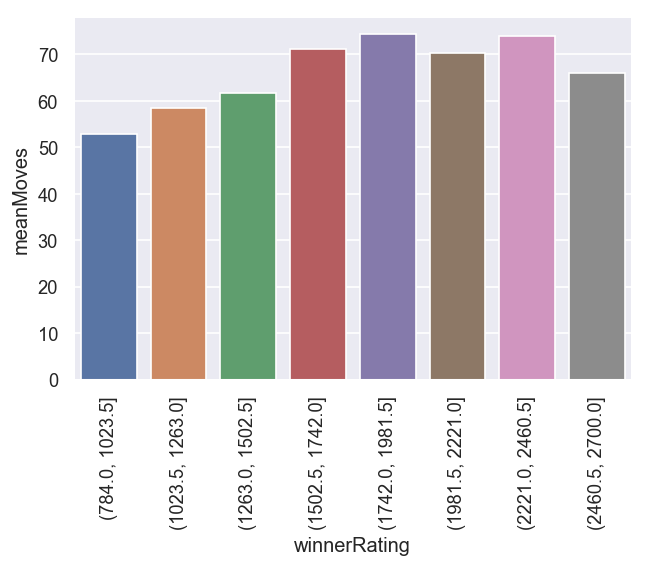

In [27]:
plt.figure(dpi=120)
sns.barplot(x="winnerRating",y="meanMoves",data=df2)
plt.xticks(rotation=90)
plt.show()

In [28]:
df1.columns

Index(['rated', 'turns', 'victory_status', 'winner', 'white_rating',
       'black_rating', 'openingMove', 'whiteFirst', 'blackFirst',
       'winnerRating'],
      dtype='object')

In [29]:
df3=df.pivot_table(values="turns",index=winnerRating_cut,columns="victory_status").unstack().reset_index()
df3.head()

,victory_status,winnerRating,0
0,draw,"(784.0, 1023.5]",41.000000
1,draw,"(1023.5, 1263.0]",68.273973
2,draw,"(1263.0, 1502.5]",72.167401
3,draw,"(1502.5, 1742.0]",89.794964
4,draw,"(1742.0, 1981.5]",93.276382


In [30]:
df3.columns=["victory_status","winnerRating","meanTurns"]

D:\bharath\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


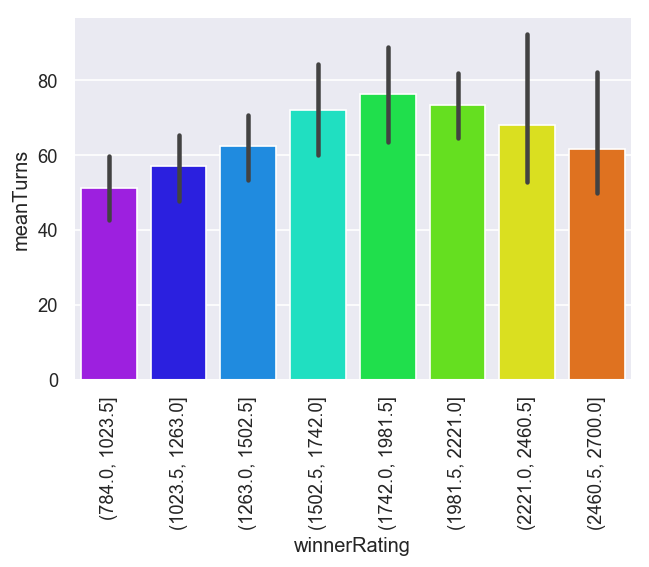

In [31]:
plt.figure(dpi=120)
sns.barplot(x="winnerRating",y="meanTurns",data=df3,palette='gist_rainbow_r')
plt.xticks(rotation=90)
plt.show()

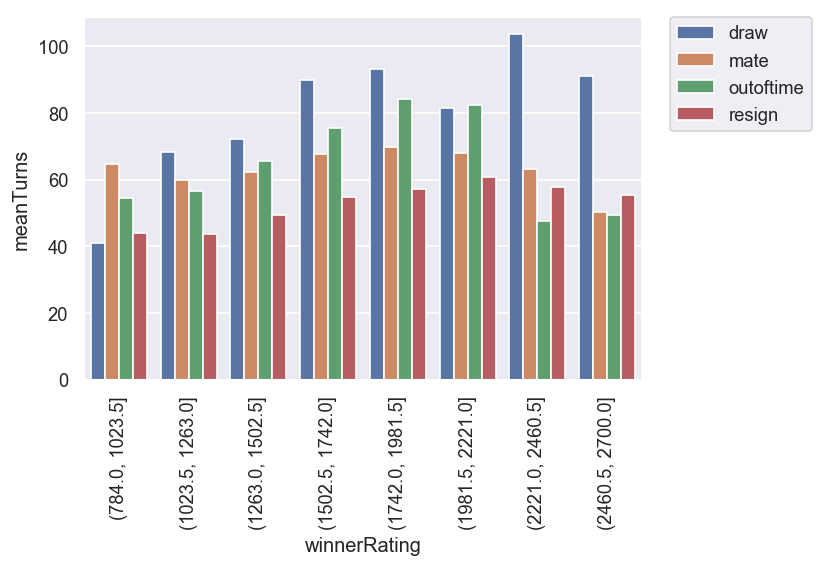

In [32]:
plt.figure(dpi=120)
sns.barplot(x="winnerRating",y="meanTurns",data=df3,hue="victory_status",palette='deep')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()